Copyright (c) 2017,2018, Johannes Schöneberg. All rights reserved.
The default copyright laws apply.

In [2]:
import csv


#http://soft-matter.github.io/trackpy/v0.3.2/tutorial/walkthrough.html


from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
#mpl.rc('figure',  figsize=(10, 6))
#mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims

import scipy


import math

from scipy import optimize

import scipy.ndimage

In [3]:
# read the movie frames

frames_ch0 = pims.TiffStack_pil('/Users/johannesschoeneberg/Desktop/PostDoc/hurley_lab/pulling_confleezers_dataSharing_local/2018-06-22_radius_calibration/movie_ch0.tif')




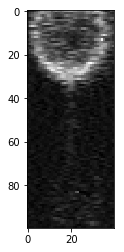

In [4]:
# crop image around vesicle attachment point
# this is necessary because otherwise i will rotate the image and it will rotate it away from my learned attachment points
frames = frames_ch0


frameId = 0
image = frames[frameId]
marginx = 50
marginy = 20
#image_centeredOnVesicleAttachmentVector = (image[20:50,10:50])
midx = int(240)
midy = int(315)
image_centeredOnVesicleAttachmentVector = image[midx-marginx:midx+marginx,midy-marginy:midy+marginy]

plt.imshow(image_centeredOnVesicleAttachmentVector,cmap='gray')

plt.show()

# fit tube to a gaussian for every frame in the movie

In [5]:
def gaussian(B,x):
    ''' Returns the gaussian function for B=m,stdev,max,offset '''
    return B[3]+B[2]/(B[1]*np.sqrt(2*np.pi))*np.exp(-((x-B[0])**2/(2*B[1]**2)))

def errfunc(p,x,y):
    return y-gaussian(p,x)





def fitGaussian(data,p0=[9,3,150,20],verbose=False):
    # p0 = [mean,variance,amplitude,yShift]
    # parameters of our gaussian

    
    
    
    y = data
    x = range(0,len(data))
    
    # initial estimate of parameters 

    fit = optimize.leastsq(errfunc,p0,args=(x,y));
    

    if(verbose):
        plt.plot(x,y,'k-',lw=3)
        plt.plot(x,gaussian(fit[0],x),'r-')
        plt.show()
    
    
    mean = fit[0][0]
    stdev = np.absolute(fit[0][1])
    offset = fit[0][3]
    FWHM = 2.355 * np.absolute(stdev)
    maxx = gaussian(fit[0],mean)
    fitconvergence = fit[1]

    if(verbose):
        print("mean:",mean,"stdev:", stdev,"max:", maxx,"FWHM:",FWHM,"offset:",offset)
        print("fit parameters: mean: {} variance: {} amplitude: {} yshift: {}".format(fit[0][0],fit[0][1],fit[0][2],fit[0][3]))
    return(np.array([mean,stdev,fit[0][2],offset,maxx,maxx-offset,FWHM,fitconvergence]))

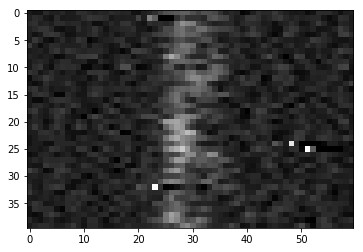

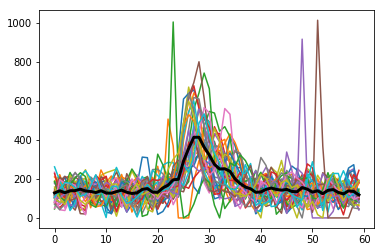

p0_guess: mean: 28 variance: 2 amplitude: 709.5 yshift: 118.2


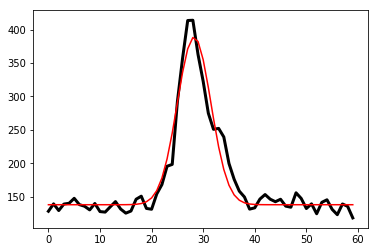

mean: 28.245582032 stdev: 3.25598798967 max: 388.733306603 FWHM: 7.66785171567 offset: 137.939758802
fit parameters: mean: 28.245582032046837 variance: 3.2559879896708424 amplitude: 2046.8644704812727 yshift: 137.93975880232702
fit[5] 250.793547801


In [7]:
# crop image around vesicle attachment point
# this is necessary because otherwise i will rotate the image and it will rotate it away from my learned attachment points
frames = frames_ch0


frameId = 600
image = frames[frameId]
marginx = 20
marginy = 30
#image_centeredOnVesicleAttachmentVector = (image[20:50,10:50])
midx = int(245)
midy = int(315)
image_centeredOnVesicleAttachmentVector = image[midx-marginx:midx+marginx,midy-marginy:midy+marginy]

plt.imshow(image_centeredOnVesicleAttachmentVector,cmap='gray')

plt.show()


for line in image_centeredOnVesicleAttachmentVector:
    plt.plot(line)

plt.plot(np.average(image_centeredOnVesicleAttachmentVector,axis=0),color='k',lw=3)    
plt.show()

averagedIntensity = np.average(image_centeredOnVesicleAttachmentVector,axis=0)
# guess that the center sits on the max                               
guess_mean = np.argmax(averagedIntensity)
# guess that the variance is where the halfmax is
halfmax = np.max(averagedIntensity)-np.min(averagedIntensity)/2
# get the indexes of the elements to the right of the maximum that are larger than the halfmax
indexes = [i for i,v in enumerate(averagedIntensity[guess_mean:-1]) if v > halfmax]
# the length of that list is our sigma guess
guess_sigma = len(indexes)

# our guess for the y-shift is the minimum of the averaged traces
guess_yShift = np.min(averagedIntensity)

# out guess for the amplitude is the difference between min and max of the trace
guess_amplitude = halfmax*2


                               
                               
                               
        

                               
p0_guess = [guess_mean,guess_sigma,guess_amplitude,guess_yShift];
print("p0_guess: mean: {} variance: {} amplitude: {} yshift: {}".format(guess_mean,guess_sigma,guess_amplitude,guess_yShift))
fit = fitGaussian(averagedIntensity,p0=p0_guess,verbose=True);

print("fit[5]",fit[5])

In [7]:
# do this for the whole movie

In [8]:
# crop image around vesicle attachment point
# this is necessary because otherwise i will rotate the image and it will rotate it away from my learned attachment points
frames = frames_ch0

fits = []

counter = 0
for frameId in range(0,10):
#for frameId in range(0,len(frames)):
    if(counter%10==0):
        print(counter)
    image = frames[frameId]
    marginx = 20
    marginy = 30
    #image_centeredOnVesicleAttachmentVector = (image[20:50,10:50])
    midx = int(245)
    midy = int(315)
    image_centeredOnVesicleAttachmentVector = image[midx-marginx:midx+marginx,midy-marginy:midy+marginy]
    
    if(False):
        plt.imshow(image_centeredOnVesicleAttachmentVector,cmap='gray')
        plt.show()
    
    if(False):
        for line in image_centeredOnVesicleAttachmentVector:
            plt.plot(line)
        plt.plot(np.average(image_centeredOnVesicleAttachmentVector,axis=0),color='k',lw=3)    
        plt.show()
    
    averagedIntensity = np.average(image_centeredOnVesicleAttachmentVector,axis=0)
    # guess that the center sits on the max                               
    guess_mean = np.argmax(averagedIntensity)
    # guess that the variance is where the halfmax is
    halfmax = np.max(averagedIntensity)-np.min(averagedIntensity)/2
    # get the indexes of the elements to the right of the maximum that are larger than the halfmax
    indexes = [i for i,v in enumerate(averagedIntensity[guess_mean:-1]) if v > halfmax]
    # the length of that list is our sigma guess
    guess_sigma = len(indexes)
    
    # our guess for the y-shift is the minimum of the averaged traces
    guess_yShift = np.min(averagedIntensity)
    
    # out guess for the amplitude is the difference between min and max of the trace
    guess_amplitude = halfmax*2
    
    
                                   
                                   
                                   
            
    
                                   
    p0_guess = [guess_mean,guess_sigma,guess_amplitude,guess_yShift];
    if(False):
        print("p0_guess: mean: {} variance: {} amplitude: {} yshift: {}".format(guess_mean,guess_sigma,guess_amplitude,guess_yShift))
    fit = fitGaussian(averagedIntensity,p0=p0_guess,verbose=False);
    fits.append(fit)
    counter = counter +1

fits = np.array(fits)

#df = pd.DataFrame(fits)
#df.to_csv("./tube_gaussian_fit_data.csv",header=['mean','stdev','fit[0][2]','offset','maxx','maxx-offset','FWHM','fitconvergence'])

0


# correlate the tube intensity with the radius, obtained by distance pulled and conservation of area

average amplitude window[553:563]: 277.84 ± 23.78


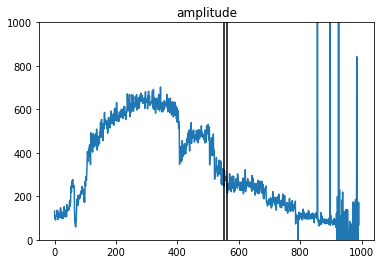

In [45]:
df_tubeFitting = pd.read_csv("./data/tube_gaussian_fit_data.csv")


plt.plot(df_tubeFitting['maxx-offset'])
plt.title('amplitude')
plt.ylim(0,1000)


pnt1 = 553
pnt2 = 563
plt.axvline(pnt1,c='k')
plt.axvline(pnt2,c='k')
avgAmplitudeInWindow = np.round(np.average(df_tubeFitting['maxx-offset'][pnt1:pnt2]),decimals=2)
stdAmplitudeInWindow = np.round(np.std(df_tubeFitting['maxx-offset'][pnt1:pnt2]),decimals=2)
print("average amplitude window[{}:{}]: {} ± {}".format(pnt1,pnt2,avgAmplitudeInWindow,stdAmplitudeInWindow))

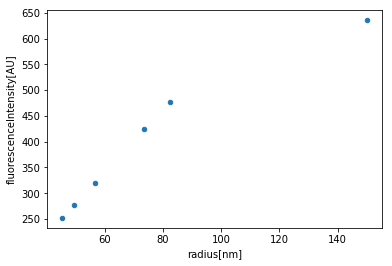

In [10]:
tubeData = np.array([[250,350,4.4,150,635.52,24.75],
                     [440,490,8.2,82.3,477.62,22.97],
                     [510,520,9.01,73.4,425.09,31.58],
                     [530,540,11.71,56.7,319.99,21.95],
                     [553,563,13.41,49.5,277.84,23.78],
                     [590,670,14.61,45.5,252.14,21.31]])
tubeData = pd.DataFrame(tubeData,columns=['startFrame','endFrame','length[um]','radius[nm]','fluorescenceIntensity[AU]','flIntStddev[AU]'])

tubeData.plot.scatter(x='radius[nm]',y='fluorescenceIntensity[AU]')

Text(0.5,0,'radius[nm]')

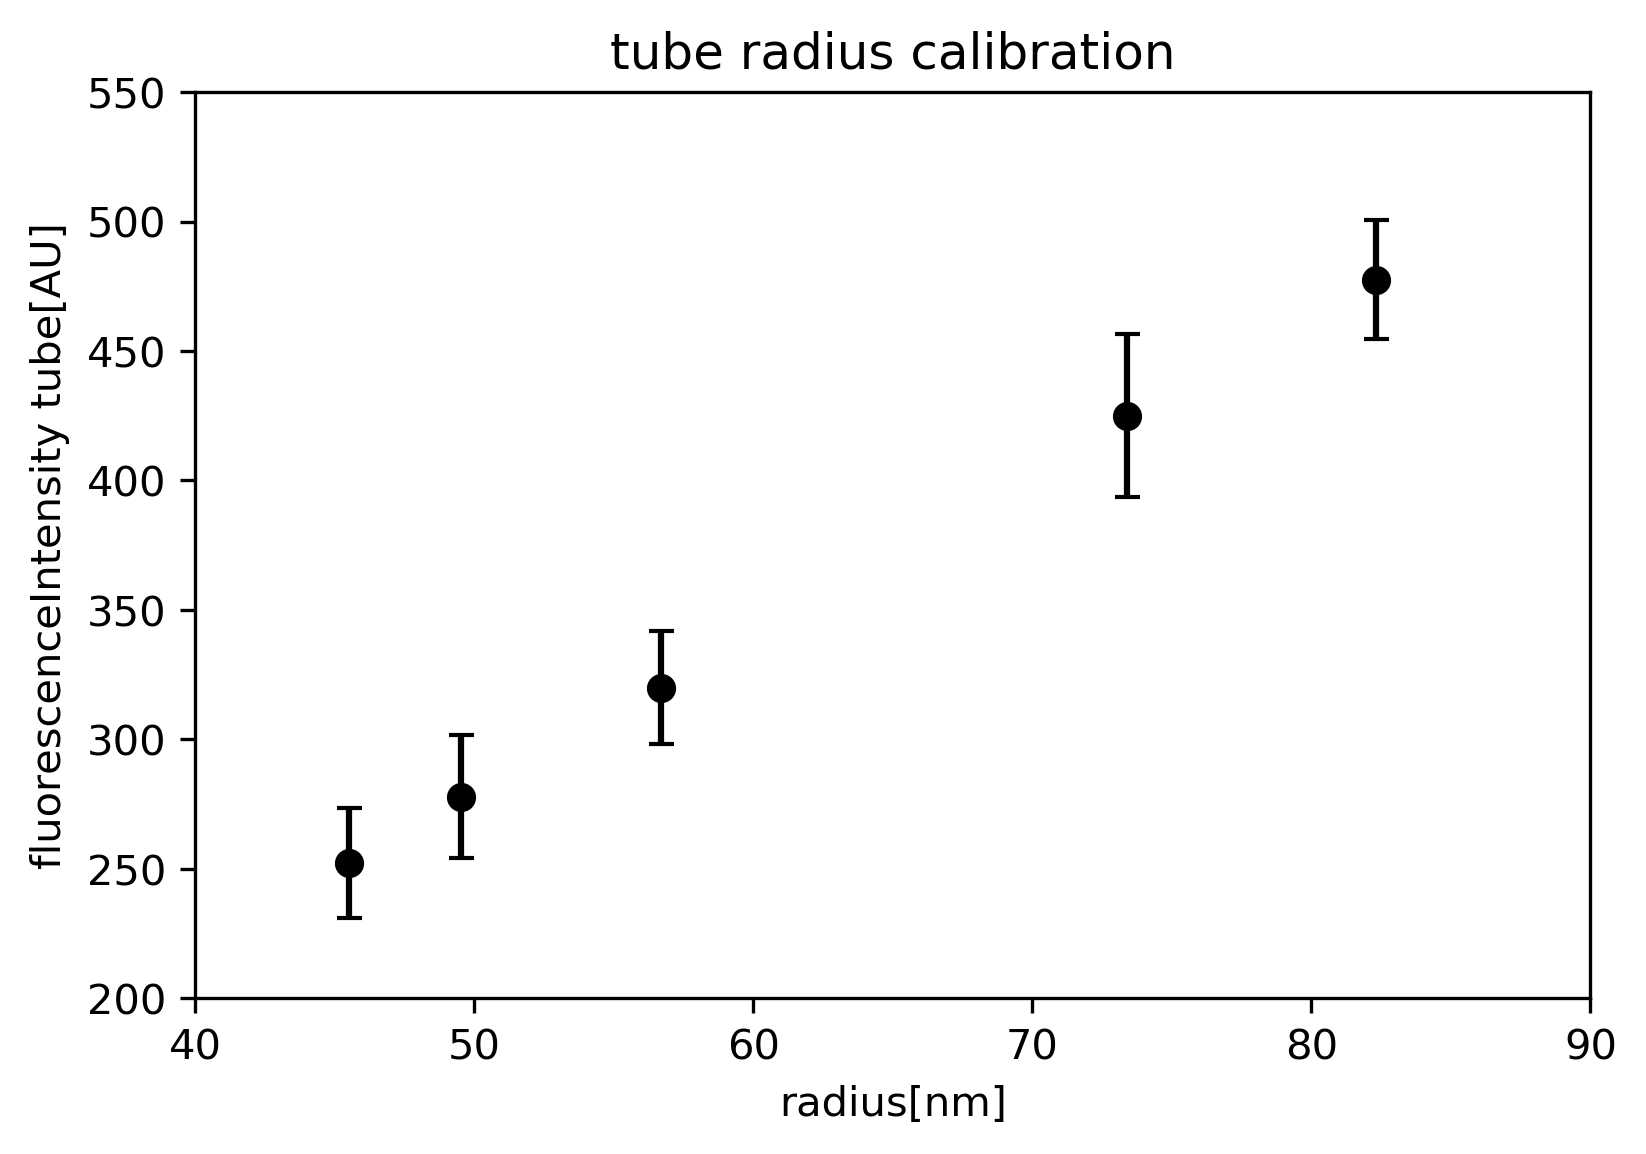

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True,dpi=300)
ax = axs
x = tubeData['radius[nm]']
y = tubeData['fluorescenceIntensity[AU]']
yerr = tubeData['flIntStddev[AU]']
ax.errorbar(x, y, yerr=yerr, fmt='o',c='k',capsize=3)
ax.set_title('tube radius calibration')
ax.set_ylim(200,550)
ax.set_xlim(40,90)
ax.set_ylabel('fluorescenceIntensity tube[AU]')
ax.set_xlabel('radius[nm]')

# Vesicle Fluorescence Intensity

detectorNoise: 136.54


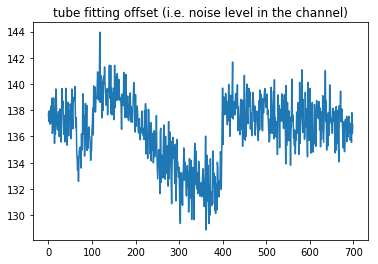

In [12]:
plt.plot(df_tubeFitting['offset'][0:700])
plt.title('tube fitting offset (i.e. noise level in the channel)')
detectorNoise = np.average(df_tubeFitting['offset'][0:700])
print("detectorNoise: {}".format(np.round(detectorNoise,decimals=2)))

fluorescenceIntensity_vesicle_mean: 987.13 ± 46.9


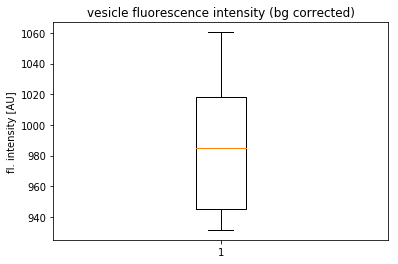

In [13]:
fluorescenceIntensity_vesicle = np.array([[1069,1197],[1068,1124],[1119,1165]])
fluorescenceIntensity_vesicle_mean = np.average(fluorescenceIntensity_vesicle)-detectorNoise
fluorescenceIntensity_vesicle_std = np.std(fluorescenceIntensity_vesicle)

print("fluorescenceIntensity_vesicle_mean: {} ± {}".format(np.round(fluorescenceIntensity_vesicle_mean,decimals=2),np.round(fluorescenceIntensity_vesicle_std,decimals=2)))



plt.boxplot(np.ndarray.flatten(fluorescenceIntensity_vesicle)-detectorNoise);
plt.title('vesicle fluorescence intensity (bg corrected)');
plt.ylabel('fl. intensity [AU]');



# R = a* (tube intensity / vesicle intensity), Sorre et al 2012

Text(0.5,0,'radius[nm]')

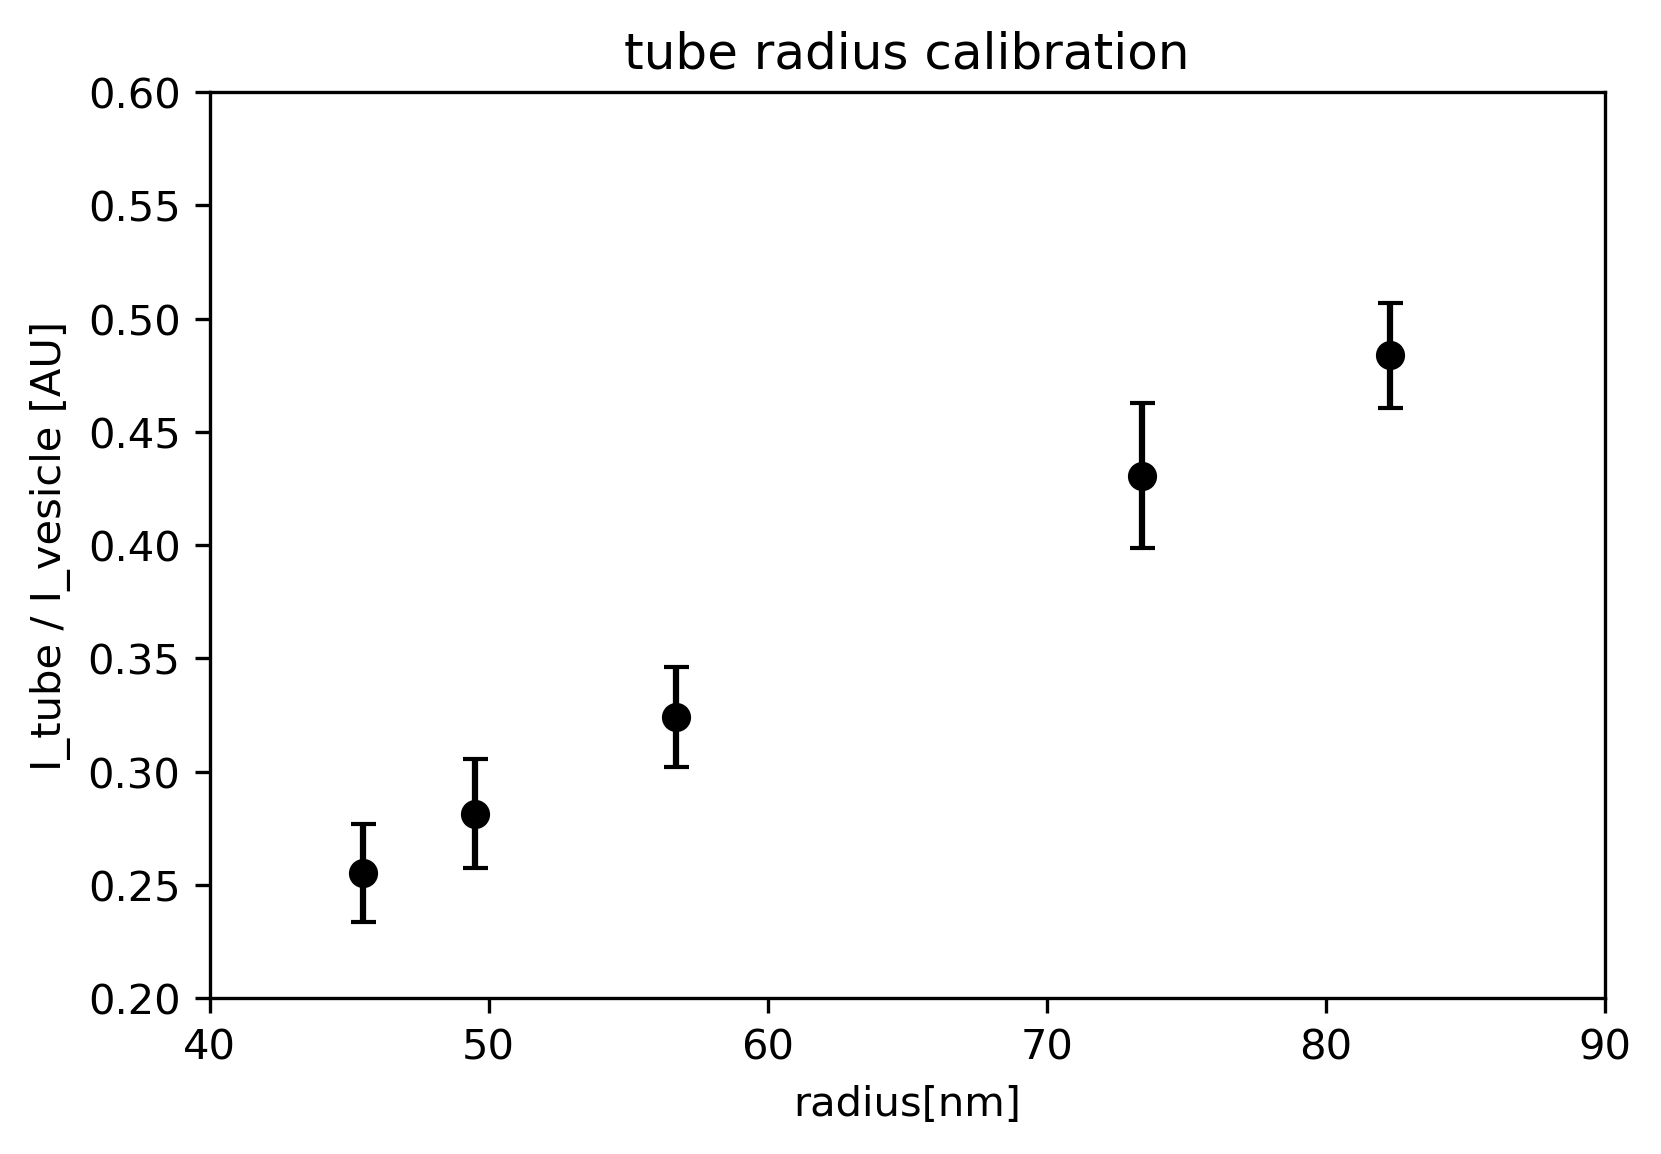

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True,dpi=300)
ax = axs
x = tubeData['radius[nm]']
y = tubeData['fluorescenceIntensity[AU]']/fluorescenceIntensity_vesicle_mean
yerr = tubeData['flIntStddev[AU]']/fluorescenceIntensity_vesicle_mean
ax.errorbar(x, y, yerr=yerr, fmt='o',c='k',capsize=3)
ax.set_title('tube radius calibration')
ax.set_ylim(0.2,0.6)
ax.set_xlim(40,90)
ax.set_ylabel('I_tube / I_vesicle [AU]')
ax.set_xlabel('radius[nm]')

In [15]:
# linear fit

slope=160.73725±5.26925, intercept=4.40121±1.91828


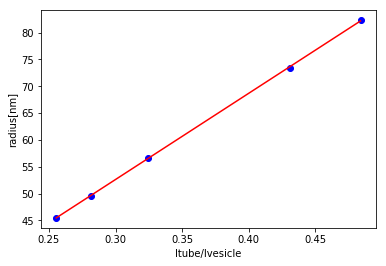

In [40]:
from scipy import stats

xx=y[1:]
yy=x[1:]
slope, intercept, r, prob2, see = stats.linregress(xx, yy)
mx = xx.mean()
sx2 = ((xx-mx)**2).sum()
sd_intercept = see * np.sqrt(1./len(x) + mx*mx/sx2)
sd_slope = see * np.sqrt(1./sx2)

print("slope={}±{}, intercept={}±{}".format(np.round(slope,decimals=5),np.round(sd_slope,decimals=5),np.round(intercept,decimals=5),np.round(sd_intercept,decimals=5)))

plt.plot(xx, yy, 'o', label='original data',color='b')
plt.plot(xx, intercept + slope*xx, 'r', label='fitted line')
plt.xlabel('Itube/Ivesicle')
plt.ylabel('radius[nm]')
plt.show()

In [17]:
# highest standard deviation in the curve:
[425.09,31.58] #intensity, standard deviation at R=75
stddevFactor = 31.58/425.09

print("prefactor in our experiments: {} ± {}".format(np.round(1/slope,decimals=0),np.round(1/slope*stddevFactor,decimals=0)))
print("prefactor in our experiments using sorre's uncertainty: {} ± {}".format(np.round(1/slope,decimals=0),np.round(1/slope*(50/200),decimals=0)))

prefactor in our experiments: 161.0 ± 12.0
prefactor in our experiments using sorre's uncertainty: 161.0 ± 40.0


# formula for calculating the radius of a tube

In [44]:
I_vesicle_exp = 987.13

def calculateTubeRadius(I_tube,I_vesicle):
    prefactorForTubeRadius = 161 #nm
    interceptForTubeRadius = 4.4
    print(I_tube/I_vesicle)
    return interceptForTubeRadius + prefactorForTubeRadius * I_tube/I_vesicle

print(len(tubeData))
for i in range(0,len(tubeData)):
    I_tube_exp = tubeData['fluorescenceIntensity[AU]'].iloc[i]
    print()
    radius_from_length = tubeData['radius[nm]'].iloc[i]
    radius_from_formula = np.round(calculateTubeRadius(I_tube_exp,I_vesicle_exp),decimals=2)
    print("radiusFromLength: {}, radiusFromFormula: {}".format(radius_from_length,radius_from_formula))

6

0.643805780394
radiusFromLength: 150.0, radiusFromFormula: 108.05

0.483847112336
radiusFromLength: 82.3, radiusFromFormula: 82.3

0.430632236889
radiusFromLength: 73.4, radiusFromFormula: 73.73

0.324161964483
radiusFromLength: 56.7, radiusFromFormula: 56.59

0.281462421363
radiusFromLength: 49.5, radiusFromFormula: 49.72

0.255427349994
radiusFromLength: 45.5, radiusFromFormula: 45.52
